In [1]:
#import libs
import pandas as pd
import numpy as np

#read dataset
df=pd.read_csv('original.csv')
drops=['clientid']
df.drop(drops,inplace=True,axis=1)
df

C:\Users\abdal\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abdal\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\abdal\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


In [2]:
#dataset analysis
print(df[df['default']==1].count()) #//283
print(df[df['default']==0].count()) #//1717 (unbalanced data............)
print(df.isnull().any()) #//null values in age column only


income     283
age        283
loan       283
default    283
dtype: int64
income     1717
age        1714
loan       1717
default    1717
dtype: int64
income     False
age         True
loan       False
default    False
dtype: bool


In [3]:
print(df[df['age']<0])#negative values only here
print(df[df['loan']<0])
print(df[df['income']<0])

          income        age         loan  default
15  50501.726689 -28.218361  3977.287432        0
21  32197.620701 -52.423280  4244.057136        0
26  63287.038908 -36.496976  9595.286289        0
Empty DataFrame
Columns: [income, age, loan, default]
Index: []
Empty DataFrame
Columns: [income, age, loan, default]
Index: []


In [4]:
#remove negative values from age column
df['age']=np.where(df['age']<0,df['age']*-1,df['age'])
df['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [5]:
# impute dataset and replace null values
df['age'].fillna(df['age'].mean(),inplace=True)
df['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [6]:
#split dataset into features and label
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [7]:
from sklearn.feature_selection import chi2
chi2(X,y)
#all features are relative to the output

(array([4.72271990e+01, 1.69902240e+03, 5.93395636e+05]),
 array([6.32170996e-12, 0.00000000e+00, 0.00000000e+00]))

In [8]:
#test the model without cluster_num paramter
X_wc=X
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_wc_train, X_wc_test, y_train, y_test = train_test_split(X_wc, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_wc_train)
X_test=sc.fit_transform(X_wc_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_wc_train, y_train)

y_pred=model.predict(X_wc_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#accuarcy without cluster_number is 94.1%
#recall is 95%



[[343   5]
 [ 18  34]]


In [9]:
X_wc_train

,income,age,loan
582,30991.431924,34.010026,4589.267265
159,31847.853719,41.416336,2913.769931
1827,24112.499394,35.971338,3285.499948
318,43777.518480,20.010928,3601.299685
708,40334.616734,45.886542,6808.869955
...,...,...,...
835,29496.594127,54.665821,2216.975334
1216,31044.391757,49.935868,4465.872769
1653,48445.113124,38.979568,8733.442215
559,53741.371019,49.729433,6513.150125


In [13]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Dropout

model=Sequential([Dense(3,activation='relu'),
                 Dropout(.3),
                 Dense(16,activation='relu'),
                 Dropout(.3),

                 Dense(32,activation='relu'),
                 Dropout(.3),

                 Dense(1,activation='sigmoid'),
                 
                 ])
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
history=model.fit(X_wc_train, y_train,validation_data=(X_wc_test,y_test), batch_size = 32, epochs = 150,verbose=2)


Epoch 1/150
50/50 - 1s - loss: 1509.7219 - acc: 0.7519 - val_loss: 711.6372 - val_acc: 0.8700
Epoch 2/150
50/50 - 0s - loss: 1134.4917 - acc: 0.7412 - val_loss: 437.0099 - val_acc: 0.8700
Epoch 3/150
50/50 - 0s - loss: 772.7203 - acc: 0.7594 - val_loss: 327.6485 - val_acc: 0.8700
Epoch 4/150
50/50 - 0s - loss: 556.0739 - acc: 0.7575 - val_loss: 205.5060 - val_acc: 0.8700
Epoch 5/150
50/50 - 0s - loss: 431.4484 - acc: 0.7569 - val_loss: 152.3556 - val_acc: 0.8700
Epoch 6/150
50/50 - 0s - loss: 339.6410 - acc: 0.7606 - val_loss: 121.7284 - val_acc: 0.8700
Epoch 7/150
50/50 - 0s - loss: 278.7850 - acc: 0.7550 - val_loss: 85.4352 - val_acc: 0.8700
Epoch 8/150
50/50 - 0s - loss: 208.9952 - acc: 0.7588 - val_loss: 69.2840 - val_acc: 0.8700
Epoch 9/150
50/50 - 0s - loss: 146.6050 - acc: 0.7869 - val_loss: 48.2344 - val_acc: 0.8700
Epoch 10/150
50/50 - 0s - loss: 155.7243 - acc: 0.7619 - val_loss: 31.1276 - val_acc: 0.8700
Epoch 11/150
50/50 - 0s - loss: 104.3080 - acc: 0.7700 - val_loss: 25.3

Epoch 92/150
50/50 - 0s - loss: 0.3247 - acc: 0.8519 - val_loss: 0.2522 - val_acc: 0.8700
Epoch 93/150
50/50 - 0s - loss: 0.3065 - acc: 0.8531 - val_loss: 0.2528 - val_acc: 0.8700
Epoch 94/150
50/50 - 0s - loss: 0.2930 - acc: 0.8544 - val_loss: 0.2528 - val_acc: 0.8700
Epoch 95/150
50/50 - 0s - loss: 0.3710 - acc: 0.8531 - val_loss: 0.2528 - val_acc: 0.8700
Epoch 96/150
50/50 - 0s - loss: 0.3559 - acc: 0.8525 - val_loss: 0.2515 - val_acc: 0.8700
Epoch 97/150
50/50 - 0s - loss: 0.2936 - acc: 0.8550 - val_loss: 0.2533 - val_acc: 0.8700
Epoch 98/150
50/50 - 0s - loss: 0.2951 - acc: 0.8544 - val_loss: 0.2531 - val_acc: 0.8700
Epoch 99/150
50/50 - 0s - loss: 0.2943 - acc: 0.8550 - val_loss: 0.2529 - val_acc: 0.8700
Epoch 100/150
50/50 - 0s - loss: 0.3221 - acc: 0.8550 - val_loss: 0.2528 - val_acc: 0.8700
Epoch 101/150
50/50 - 0s - loss: 0.3020 - acc: 0.8550 - val_loss: 0.2521 - val_acc: 0.8700
Epoch 102/150
50/50 - 0s - loss: 0.2820 - acc: 0.8550 - val_loss: 0.2552 - val_acc: 0.8700
Epoch 1

In [12]:
y_pred = model.predict(X_wc_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#val_acc does not increase 

[[348   0]
 [ 52   0]]


In [14]:
blank=X[X['age']==' '].count()
blank

income    0
age       0
loan      0
dtype: int64

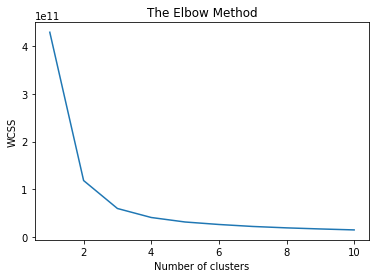

In [15]:
#use elbow method to determine the best number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#the result shows that the best number of clusters is 3

In [16]:
#run kmeans algo on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 1, 2, ..., 0, 0, 2])

In [17]:
#add the result as a new column to the dataset
arr=y_kmeans
X['cluster'] = arr.tolist()
X

,income,age,loan,cluster
0,66155.925095,59.017015,8106.532131,2
1,34415.153966,48.117153,6564.745018,1
2,57317.170063,63.108049,8020.953296,2
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,2
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,2
1996,69516.127573,23.162104,3503.176156,2
1997,44311.449262,28.017167,5522.786693,0
1998,43756.056605,63.971796,1622.722598,0


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [19]:
#normalize the trainig data 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [20]:
#excute LR model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#accuarcy after adding cluster number is 95.7%
#recall is 97.6% (the most important metric because ofthe unblance in data)

[[339   9]
 [  7  45]]


In [23]:
#ann model 
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Dropout

model=Sequential([Dense(4,activation='relu'),
                 Dropout(.3),
                 Dense(16,activation='relu'),
                 Dropout(.3),

                 Dense(32,activation='relu'),
                 Dropout(.3),

                 Dense(1,activation='sigmoid'),
                 
                 ])
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
history=model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 150,verbose=2)


Epoch 1/150
50/50 - 1s - loss: 0.5591 - acc: 0.8119 - val_loss: 0.4573 - val_acc: 0.8700
Epoch 2/150
50/50 - 0s - loss: 0.4497 - acc: 0.8531 - val_loss: 0.3866 - val_acc: 0.8700
Epoch 3/150
50/50 - 0s - loss: 0.4078 - acc: 0.8556 - val_loss: 0.3550 - val_acc: 0.8700
Epoch 4/150
50/50 - 0s - loss: 0.3842 - acc: 0.8556 - val_loss: 0.3361 - val_acc: 0.8700
Epoch 5/150
50/50 - 0s - loss: 0.3652 - acc: 0.8550 - val_loss: 0.3144 - val_acc: 0.8700
Epoch 6/150
50/50 - 0s - loss: 0.3498 - acc: 0.8556 - val_loss: 0.2950 - val_acc: 0.8700
Epoch 7/150
50/50 - 0s - loss: 0.3329 - acc: 0.8569 - val_loss: 0.2725 - val_acc: 0.8700
Epoch 8/150
50/50 - 0s - loss: 0.3247 - acc: 0.8550 - val_loss: 0.2507 - val_acc: 0.8700
Epoch 9/150
50/50 - 0s - loss: 0.3079 - acc: 0.8625 - val_loss: 0.2267 - val_acc: 0.8700
Epoch 10/150
50/50 - 0s - loss: 0.2938 - acc: 0.8650 - val_loss: 0.2062 - val_acc: 0.8875
Epoch 11/150
50/50 - 0s - loss: 0.2819 - acc: 0.8662 - val_loss: 0.1910 - val_acc: 0.8950
Epoch 12/150
50/50 

Epoch 93/150
50/50 - 0s - loss: 0.1177 - acc: 0.9413 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 94/150
50/50 - 0s - loss: 0.1247 - acc: 0.9388 - val_loss: 0.0349 - val_acc: 0.9875
Epoch 95/150
50/50 - 0s - loss: 0.1060 - acc: 0.9500 - val_loss: 0.0316 - val_acc: 0.9900
Epoch 96/150
50/50 - 0s - loss: 0.1344 - acc: 0.9362 - val_loss: 0.0429 - val_acc: 0.9875
Epoch 97/150
50/50 - 0s - loss: 0.1270 - acc: 0.9400 - val_loss: 0.0351 - val_acc: 0.9900
Epoch 98/150
50/50 - 0s - loss: 0.1263 - acc: 0.9331 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 99/150
50/50 - 0s - loss: 0.1230 - acc: 0.9406 - val_loss: 0.0370 - val_acc: 0.9875
Epoch 100/150
50/50 - 0s - loss: 0.1328 - acc: 0.9362 - val_loss: 0.0340 - val_acc: 0.9900
Epoch 101/150
50/50 - 0s - loss: 0.1116 - acc: 0.9506 - val_loss: 0.0390 - val_acc: 0.9900
Epoch 102/150
50/50 - 0s - loss: 0.1128 - acc: 0.9494 - val_loss: 0.0326 - val_acc: 0.9875
Epoch 103/150
50/50 - 0s - loss: 0.1319 - acc: 0.9406 - val_loss: 0.0318 - val_acc: 0.9850
Epoch 

In [432]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#recall is 99.4 :)   it means validation set exampels are easy to the model val_acc > train_acc

[[347   1]
 [  2  50]]
